In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys

In [35]:
df = pd.read_csv('Pokemon.csv', delimiter=",")

# Exploratory Data Analysis (EDA)

In [36]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Cleaning

In [37]:
df=df.drop(['#'],axis=1) #drop the columns with axis=1;axis=0 is for rows
df.columns = df.columns.str.upper().str.replace('_', '') #change into upper case
df = df.set_index('NAME') #change and set the index to the name attribute
df.index = df.index.str.replace(".*(?=Mega)", "")
df.describe()

/Users/jean-paul.bella/opt/anaconda3/envs/ml_python/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [38]:
df["LEGENDARY"] = df["LEGENDARY"].astype(int)
df['LEGENDARY'].describe()
df['LEGENDARY'].value_counts()

0    735
1     65
Name: LEGENDARY, dtype: int64

In [39]:
numerical_cols = df.describe().columns
print(numerical_cols)
interesting_cols = ['HP', 'ATTACK', 'DEFENSE', 'SP. ATK', 'SP. DEF', 'SPEED',
       'GENERATION', 'LEGENDARY']
df_num = df[interesting_cols]
df_num.head()

Index(['TOTAL', 'HP', 'ATTACK', 'DEFENSE', 'SP. ATK', 'SP. DEF', 'SPEED',
       'GENERATION', 'LEGENDARY'],
      dtype='object')


,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,
Bulbasaur,45,49,49,65,65,45,1,0
Ivysaur,60,62,63,80,80,60,1,0
Venusaur,80,82,83,100,100,80,1,0
Mega Venusaur,80,100,123,122,120,80,1,0
Charmander,39,52,43,60,50,65,1,0


<AxesSubplot:>

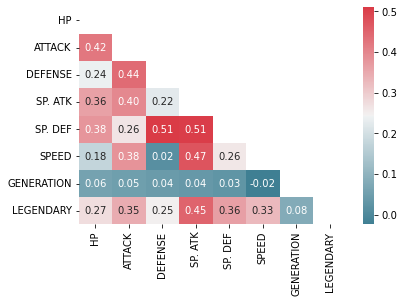

In [40]:

corr = df_num.corr()
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(df_num.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, cmap=cmap)

## Conclusion 
<span style="color:yellow">
No real correlation between features
</span>

## Analysing dataset

In [41]:
# Get index of greatest value
max_hp_id = df['HP'].argmax()
# Show row data by row index
print(df.iloc[max_hp_id])

TYPE 1        Normal
TYPE 2           NaN
TOTAL            540
HP               255
ATTACK            10
DEFENSE           10
SP. ATK           75
SP. DEF          135
SPEED             55
GENERATION         2
LEGENDARY          0
Name: Blissey, dtype: object


In [42]:
print(df.loc['Bulbasaur']) #retrieves complete row data from index with value Bulbasaur


TYPE 1         Grass
TYPE 2        Poison
TOTAL            318
HP                45
ATTACK            49
DEFENSE           49
SP. ATK           65
SP. DEF           65
SPEED             45
GENERATION         1
LEGENDARY          0
Name: Bulbasaur, dtype: object


In [43]:
t1 = df['TYPE 1'].unique()
t2 = df['TYPE 2'].unique()
types = np.array(list(set([*t1, *t2])))
print(types)

['nan' 'Bug' 'Poison' 'Steel' 'Ghost' 'Fire' 'Psychic' 'Normal' 'Rock'
 'Dragon' 'Grass' 'Ground' 'Electric' 'Ice' 'Water' 'Fighting' 'Flying'
 'Fairy' 'Dark']


In [44]:
strong=df.sort_values(by='TOTAL', ascending=False) 
strong.head(n=20)

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,1
Mega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,1
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,1
KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,1
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,1
Arceus,Normal,NaN,720,120,120,120,120,120,120,4,1
KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,1
KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,1
Mega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,0


## Subsetting

In [45]:
print(df["GENERATION"].where(df['GENERATION']> 1).first_valid_index())
df.loc['Chikorita']

Chikorita


TYPE 1        Grass
TYPE 2          NaN
TOTAL           318
HP               45
ATTACK           49
DEFENSE          65
SP. ATK          49
SP. DEF          65
SPEED            45
GENERATION        2
LEGENDARY         0
Name: Chikorita, dtype: object

In [46]:
print(df["GENERATION"].where(df['GENERATION'] == 1).last_valid_index())

Mew


In [47]:
# Subset of whole dataset 

# df1 = df.iloc[:166]
df1 = df.loc[:'Mew']
# df1_bis = df[df["GENERATION"]==1]
df1.tail()

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,0
Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,1
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,1
Mega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,1
Mew,Psychic,NaN,600,100,100,100,100,100,100,1,0


## Plotting

## Best Total

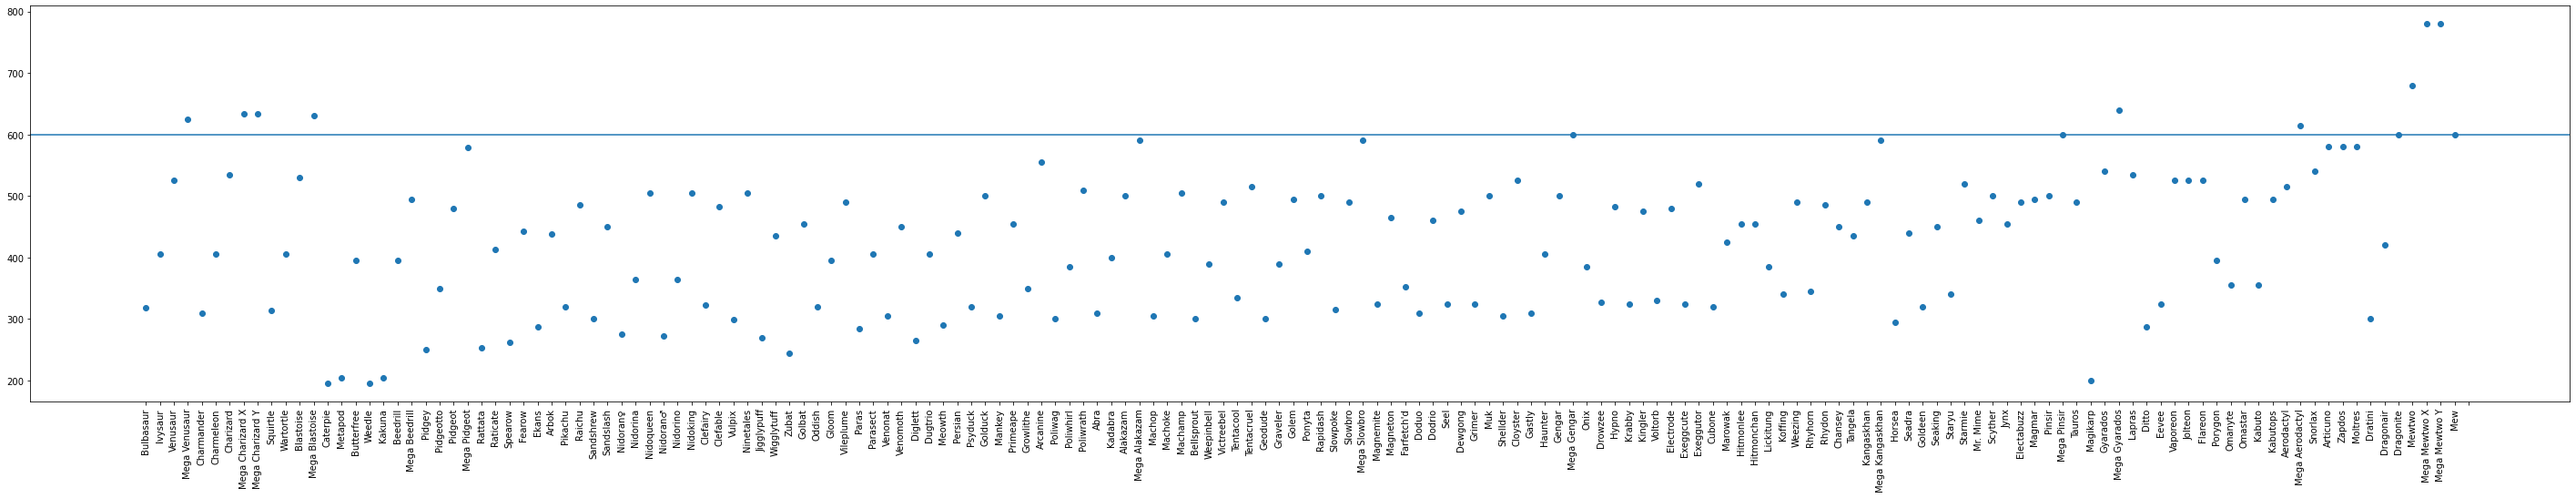

In [48]:
plt.figure(figsize=(50,8))
X = df1.index
y = df1['TOTAL']
plt.scatter(X, y)
plt.axhline(600)
plt.xticks(np.arange(0, len(df1)+1, 1.0), rotation=90)
plt.show()

## Total repartition

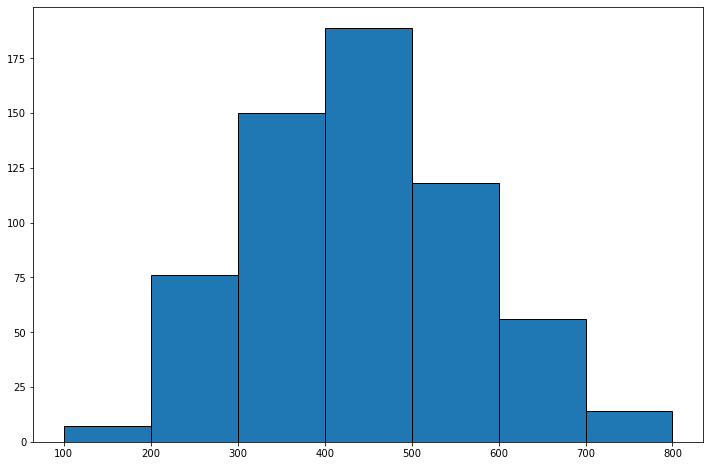

In [62]:
plt.figure(figsize=(12,8))
X = df1['TOTAL']
bins = np.arange(start=100, step=100, stop=900)
plt.hist(X, edgecolor="k", bins=bins)
plt.show()

Almost a normal distribution => Seems right

## Type repartition

In [50]:
type_repart = df['TYPE 1'].value_counts()
type_repart_indexes = type_repart.index.tolist()
print(type_repart_indexes)

['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Dragon', 'Ground', 'Ghost', 'Dark', 'Poison', 'Steel', 'Fighting', 'Ice', 'Fairy', 'Flying']


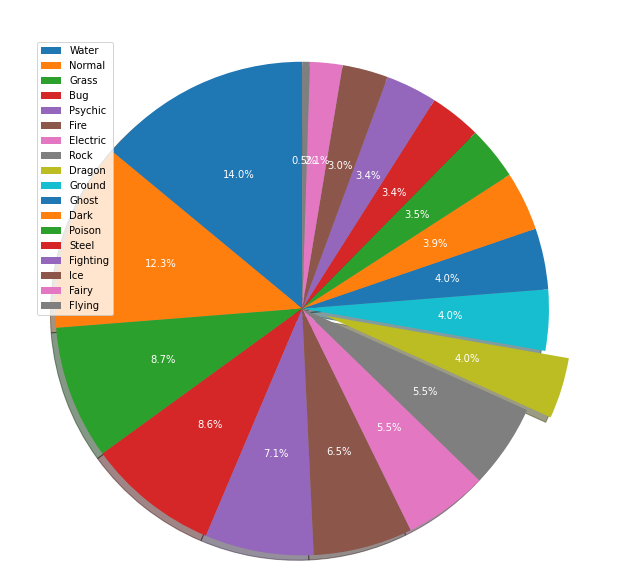

In [51]:

explode = np.zeros_like(type_repart, dtype=np.float32) # Need to parse to float, default to int
dragon_index = type_repart_indexes.index('Dragon')
explode[dragon_index] = 0.1
plt.pie(type_repart, labels=type_repart_indexes, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':"w"})
plt.axis('equal')
plt.legend()
plt.title("Percentage of Different Types of Pokemon", pad= 20, color="white", fontweight="bold")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

## Strongest generation


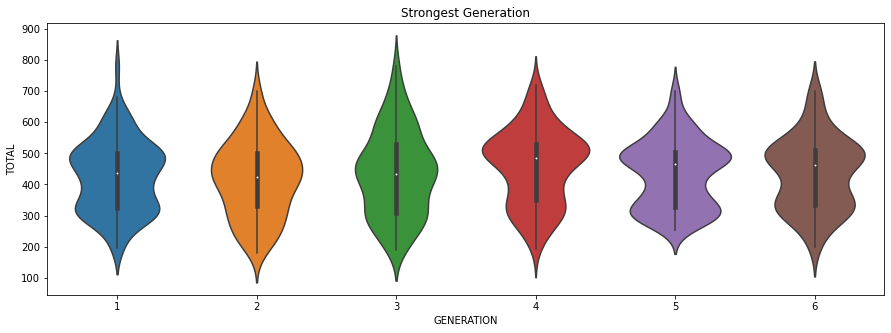

In [52]:
plt.subplots(figsize = (15,5))
plt.title('Strongest Generation')
sns.violinplot(x = "GENERATION", y = "TOTAL",data = df)
plt.show()

=> The third one has the strongest pokemon

## Strong Pokemons By Type

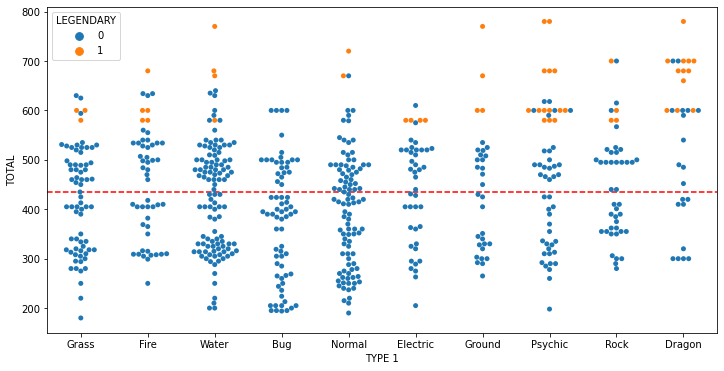

In [53]:
plt.figure(figsize=(12,6))
top_types=df['TYPE 1'].value_counts()[:10] #take the top 10 Types
df1=df[df['TYPE 1'].isin(top_types.index)] #take the pokemons of the type with highest numbers, top 10
sns.swarmplot(x='TYPE 1',y='TOTAL',data=df1,hue='LEGENDARY') # this plot shows the points belonging to individual pokemons
# It is distributed by Type
plt.axhline(df1['TOTAL'].mean(),color='red',linestyle='dashed')
plt.show()